In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
medical = pd.read_csv('expenses.csv')
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
medical['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
fig = px.histogram(medical, x='age', marginal='box',nbins=47, title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
bmi = px.histogram(medical, x='bmi', marginal='box', title='Distribution of Body Mass Index')
bmi.update_layout(bargap=0.1)
bmi.show()

In [9]:
charges = px.histogram(medical, x='charges', marginal='box', title='Annual Medical Charges', color='smoker')
charges.update_layout(bargap=0.1)
charges.show()

In [10]:
gender = px.histogram(medical, x='charges', marginal='box', title='Gender based distribution', color='sex')
gender.update_layout(bargap=0.1)
gender.show()

In [11]:
region = px.histogram(medical, x='charges', marginal='box', title='Changes DIstribution based on Region', color='region')
region.update_layout(bargap=0.1)
region.show()

In [12]:
fig = px.scatter(medical, x='age', y='charges', color='smoker', hover_data=['sex'], title='Age vs Changes', opacity=0.5)
fig.update_traces(marker_size=10)
fig

In [13]:
bmismoker= px.scatter(medical, x='bmi', y='charges', color='smoker', opacity=0.5, title='BMI v/s Charges', hover_data=['sex'])
bmismoker.show()

In [14]:
px.violin(medical, x='children', y='charges')

In [15]:
medical.charges.corr(medical.age)

np.float64(0.2990081933306476)

In [16]:
medical.charges.corr(medical.bmi)

np.float64(0.19834096883362895)

In [17]:
medical.charges.corr(medical.children)

np.float64(0.06799822684790478)

In [18]:
medical.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


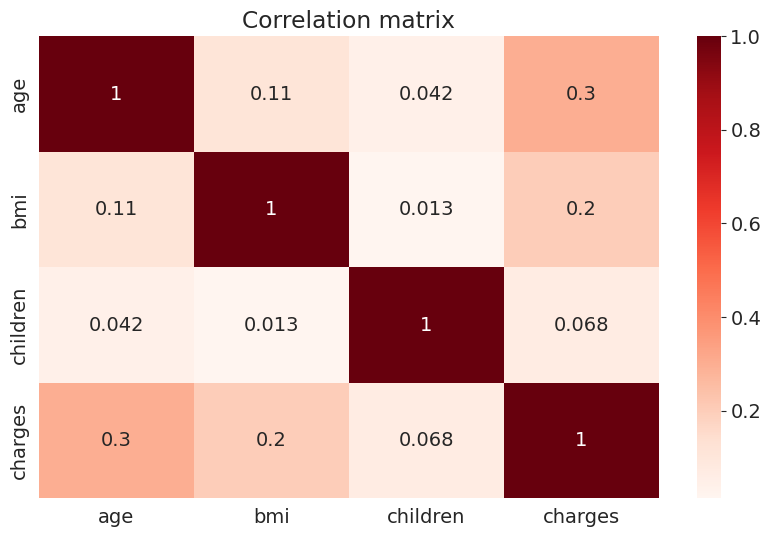

In [19]:
sns.heatmap(medical.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation matrix')
plt.show()

In [20]:
non_smoker_df = medical[medical['smoker'] == 'no']
smoker_df = medical[medical['smoker'] == 'yes']

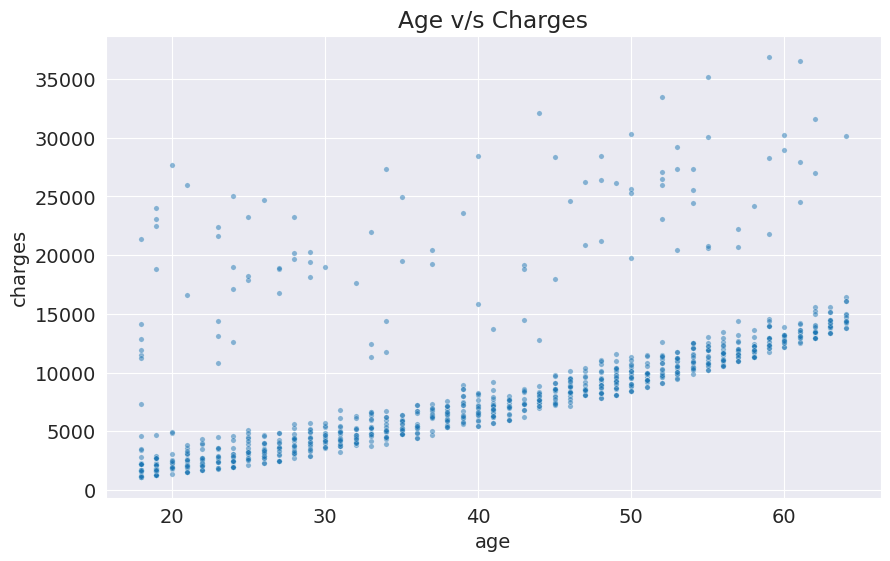

In [21]:
sns.scatterplot(data=non_smoker_df, x='age',y='charges', alpha=0.5, s=15)
plt.title('Age v/s Charges')
plt.show()


In [22]:
def estimate_charges(age, w, b):
    return (age * w) + b

In [23]:
w=50
b=100

In [24]:
estimate_charges(19,w,b)

1050

In [25]:
ages = non_smoker_df['age']
estimate_charges = estimate_charges(ages, w, b)
estimate_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [26]:
non_smoker_df['charges']

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

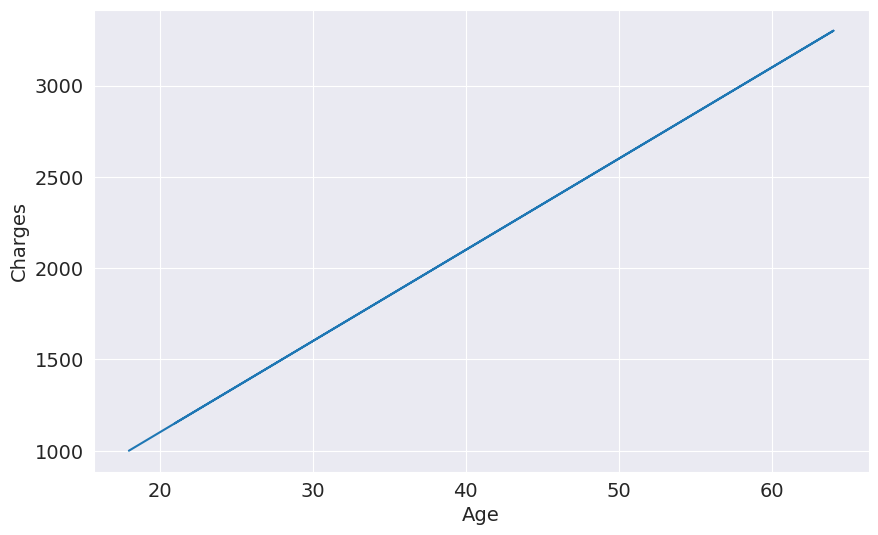

In [27]:
plt.plot(ages, estimate_charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

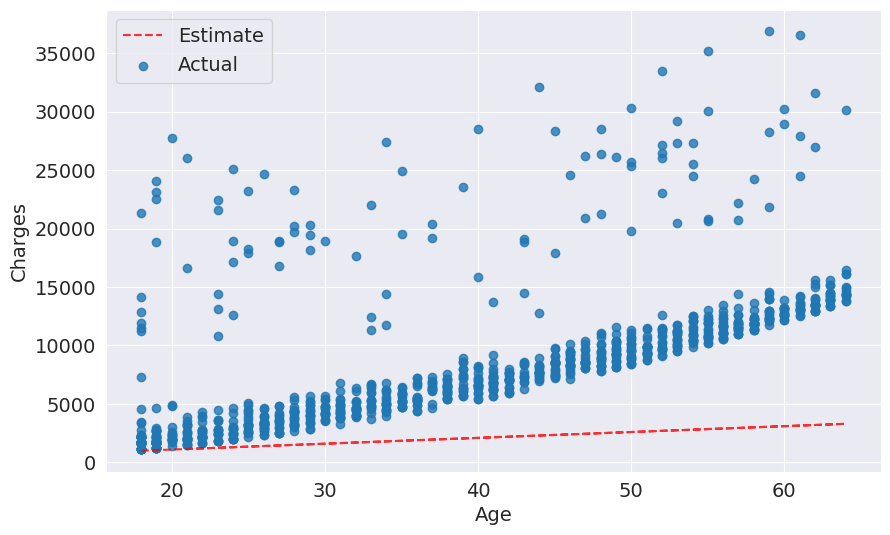

In [28]:
target = non_smoker_df['charges']

plt.plot(ages, estimate_charges, 'r--', alpha=0.8)
plt.scatter(ages, target, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [29]:
def estimate_charges(features, w, b):
    age, bmi = features
    return (age * w[0]) + (bmi * w[1])

In [30]:
def try_parameters(w, b):

    ages = non_smoker_df['age']
    target = non_smoker_df['charges']

    predicted_charges =  estimate_charges(ages, w, b)

    plt.plot(ages, predicted_charges, 'r--', alpha=0.8)
    plt.scatter(ages, target, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])
    plt.show()
    

In [31]:
# try_parameters(400,-5900)
prediction = estimate_charges

In [32]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

In [33]:
w=50
b=100
# try_parameters(w,b)

In [34]:
target = non_smoker_df['charges']
# prediction = estimate_charges(non_smoker_df['age'],w,b)

In [35]:
# rmse(target=target, prediction=prediction)

In [36]:
def try_parameters(w, b):

    ages = non_smoker_df['age']
    bmi = non_smoker_df['bmi']
    target = non_smoker_df['charges']

    weights = [w[0], w[1]]
    prediction =  estimate_charges([ages,bmi], weights, b)

    plt.plot(ages, prediction, 'r-', alpha=0.8)
    plt.scatter(ages, target, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])
    loss = rmse(target=target, prediction=prediction)
    print("RMSE",loss)
    plt.show()    
    

RMSE 9998.315741205686


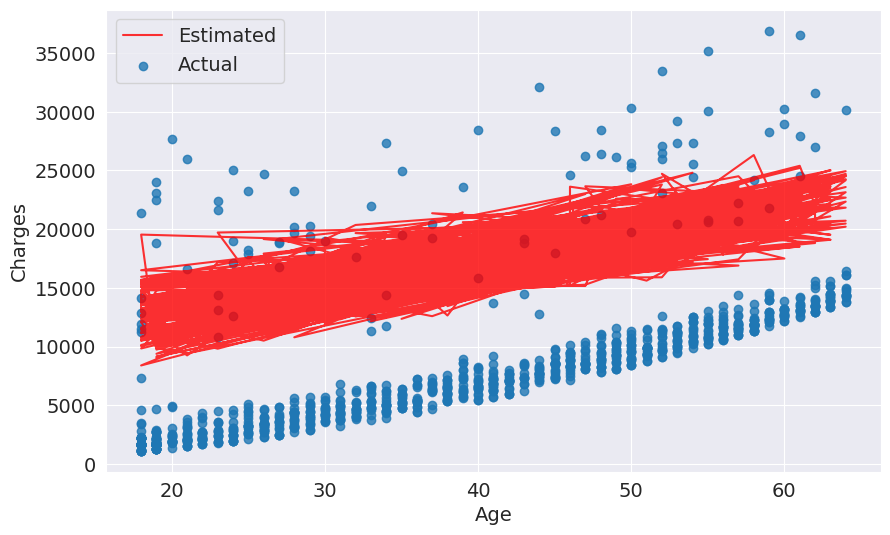

In [37]:
try_parameters([200,300],-4900)

In [38]:
model = LinearRegression()

In [39]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [40]:
inputs = non_smoker_df[['age','bmi','children']]
target = non_smoker_df['charges']
print('input shape', inputs.shape)
print('target shape', target.shape)

input shape (1064, 3)
target shape (1064,)


In [41]:
model.fit(inputs, target)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# model.predict(np.array([[23, 23],[37,34],[61,24]]))

In [43]:
predictions = model.predict(inputs)
predictions

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [44]:
inputs


,age,bmi,children
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
5,31,25.740,0
...,...,...,...
1332,52,44.700,3
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0


In [45]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [46]:
rmse(target, predictions)

np.float64(4608.470405038247)

In [47]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [48]:
model.intercept_

np.float64(-2809.2976032235892)

RMSE 5145.278221168594


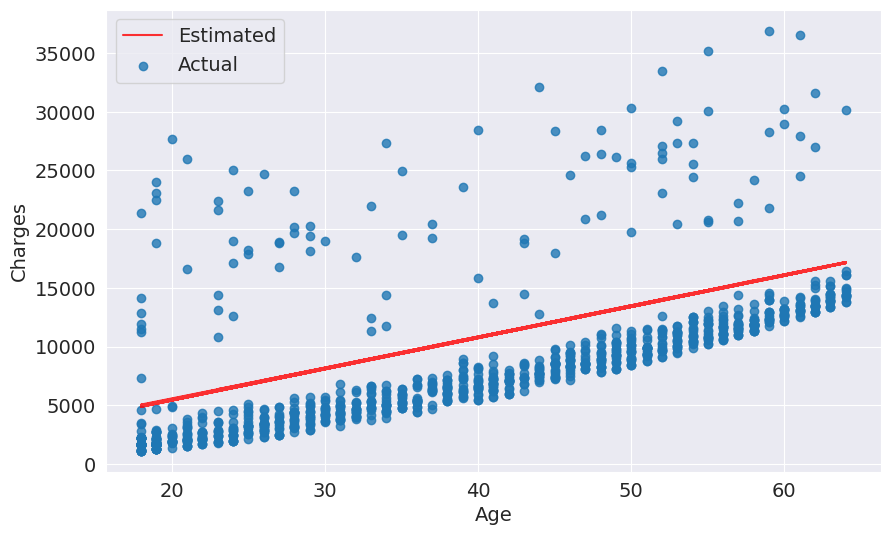

In [49]:
try_parameters(model.coef_, model.intercept_)

In [50]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [51]:
def try_parameters_smoker(w, b):
    age = smoker_df['age']
    target = smoker_df['charges']

    prediction = estimate_charges(age,w,b)

    plt.plot(age, prediction, 'r', alpha=0.5)
    plt.scatter(age, target, alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    plt.show()

In [52]:
# try_parameters_smoker(300, 17000)

In [53]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [54]:
input = smoker_df[['age']]
target = smoker_df['charges']
print(target.shape)

(274,)


In [55]:
model.fit(input, target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
model.predict(np.array([[23],[42],[60]]))

/home/adityaraut/Documents/Machine-Learning-FCC/torchenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 33114.10741553, 38608.38425351])

In [57]:
rmse(target, model.predict(input))

np.float64(10711.00334810241)

In [58]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

# loss = rmse(targets, prediction)
# print('Loss:', loss)

In [59]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', color='age')
fig

In [60]:
non_smoker_df['charges'].corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [61]:
fig = px.strip(non_smoker_df, x='children', y='charges')
fig

In [62]:
del rmse  # remove the previous tuple

def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target - prediction)))


inputs = smoker_df[['age','bmi', 'children']]
targets = smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 5718.202480524154


In [63]:
inputs = medical[['age','bmi','children']]
targets = medical['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss :", loss)

Loss : 11355.317901125973


In [64]:
del rmse  # remove the previous tuple

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


inputs = non_smoker_df[['age','bmi','children']]
targets = non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss :", loss)

Loss : 4608.470405038247


<Axes: xlabel='smoker', ylabel='charges'>

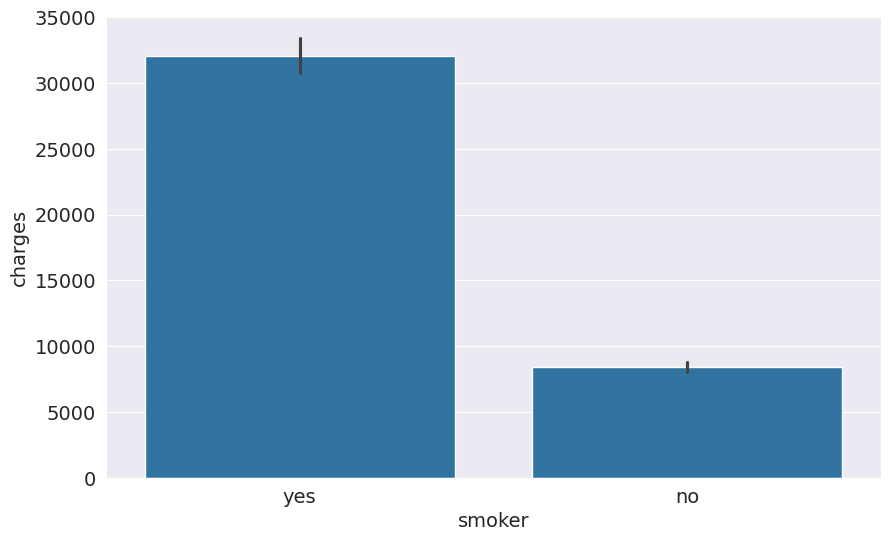

In [65]:
sns.barplot(medical, x='smoker', y='charges')


In [66]:
smoker_code = {
    'no' : 0,
    'yes' : 1
}

In [67]:
medical['smoker_code'] = medical.smoker.map(smoker_code)

In [68]:
medical

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [69]:
inputs = medical[['age','smoker_code', 'bmi', 'children']]
targets = medical['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

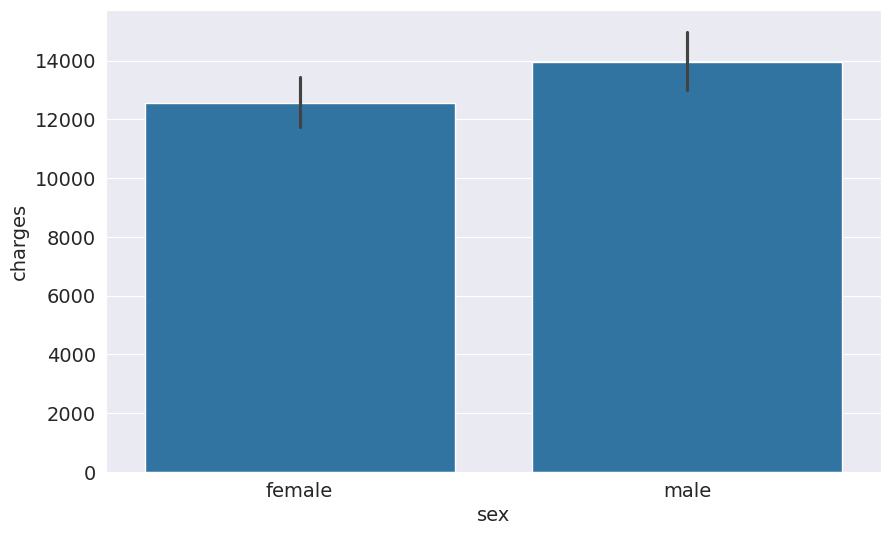

In [70]:
sns.barplot(medical, x='sex', y='charges')

<Axes: xlabel='region', ylabel='charges'>

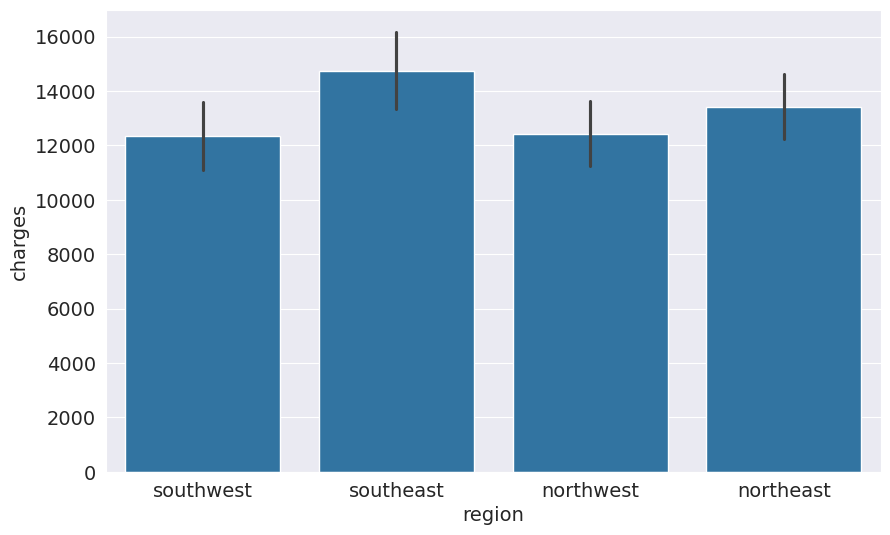

In [71]:
sns.barplot(medical, x='region', y='charges')

In [72]:
sex_code = {
    'female' : 0,
    'male' : 1
}

In [73]:
medical['sex_code'] = medical.sex.map(sex_code)

In [74]:
medical

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [75]:
inputs = medical[['age', 'smoker_code', 'sex_code', 'bmi', 'children']]
targets = medical['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.100708754546


In [76]:
region_code = {
    'northwest' : 0,
    'southwest' : 1,
    'northeast' : 2,
    'southeast' : 3
}

In [77]:
medical['region_code'] = medical.region.map(region_code)

medical.charges.corr(medical.region_code)

np.float64(0.07578815444658252)

In [78]:
medical['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [79]:
inputs = medical[['age','bmi','children', 'smoker_code', 'sex_code', 'region_code']]
targets = medical['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6055.023353056269


In [80]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [81]:
one_hot = enc.transform(medical[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [82]:
medical[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [83]:
medical

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,region_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,3,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,3,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,2,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,3,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,0.0,0.0,0.0,1.0


In [84]:
inputs = medical[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical['charges']

model = LinearRegression().fit(inputs, targets)  

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [85]:
non_smoker_df['sex_code'] = medical.sex.map(sex_code)


enc.fit(non_smoker_df[['region']])
enc.categories_

/tmp/ipykernel_5859/2009921886.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [86]:
smoker_df['sex_code'] = medical.sex.map(sex_code)

enc.fit(smoker_df[['region']])
enc.categories_

/tmp/ipykernel_5859/2059244416.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [87]:
one_hot_smoker = enc.transform(smoker_df[['region']]).toarray()
one_hot_non_smoker = enc.transform(non_smoker_df[['region']]).toarray()

In [88]:
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot_non_smoker
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot_smoker


/tmp/ipykernel_5859/2698173265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5859/2698173265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5859/2698173265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5859

In [89]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0


In [90]:

inputs = smoker_df[['age','bmi','children', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']]
targets = smoker_df['charges'] 

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  5668.4678821121515


In [91]:
inputs = non_smoker_df[['age','bmi','children', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']]
targets = non_smoker_df['charges'] 

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4573.074988795492
